In [6]:
from astropy.stats import sigma_clip, SigmaClip, gaussian_fwhm_to_sigma, bootstrap
import numpy as np
from astropy.modeling import models, fitting
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
x = np.array((1.0,2.,3,4,5))
y = x+0.4*np.random.random(size=len(x))
yerr = np.random.random(size=len(x))*0.25 + 0.05

In [12]:
from astropy.table import Table

In [13]:
AT=Table((np.arange(len(x)),x,y,yerr),names=['ind','mag_cat','mag_inst','err_inst'])
AT

ind,mag_cat,mag_inst,err_inst
int64,float64,float64,float64
0,1.0,1.2226101808846825,0.08645027116889344
1,2.0,2.3922053019837004,0.10713439717855629
2,3.0,3.3134335939257107,0.292324814500406
3,4.0,4.21557885506655,0.29844157213241845
4,5.0,5.059700950569919,0.06664018162598458


In [461]:
parnames = ['intercept','test']
pars={}

for par in parnames:
    pars[par]=np.ones(len(bootinds), dtype=np.float64)
pars

[np.nanmedian(pars[par]) for par in pars]

#bp=best_fit.parameters[np.array(best_fit.param_names) == parname][0]

[1.0, 1.0]

[1.0, 1.0]

In [456]:
pars = {}
parnames = ['intercept']
[pars[par]=np.ones(len(bootinds), dtype=np.float64) for par in parnames]
pars

SyntaxError: invalid syntax (<ipython-input-456-c8bce628663a>, line 3)

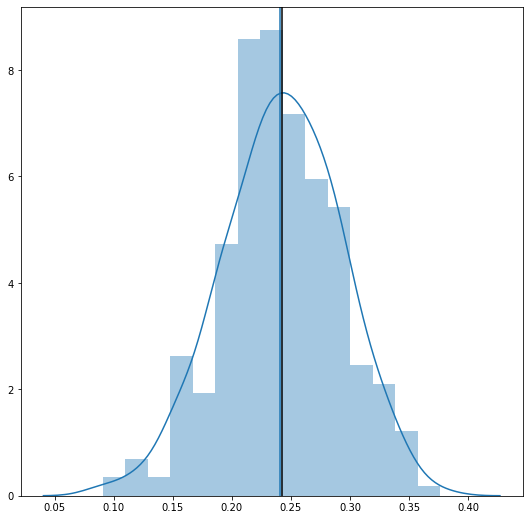

In [14]:
n=300
bootstraps=bootstrap(AT['ind'],bootnum=n)
bootstraps.sort()
bootinds=bootstraps.astype(int)
model = models.Linear1D(slope=1.0,fixed={'slope':True})
outlier_kwargs={'sigma':3}
fitter = fitting.FittingWithOutlierRemoval(fitting.LinearLSQFitter(), sigma_clip, **outlier_kwargs)
ints = np.ones(len(bootinds),dtype=np.float64) 
#fig,ax = plt.subplots()

for i,bs in enumerate(bootinds):
    w=(1.0/yerr[bs])**2
    w=np.ones(len(yerr[bs]),dtype=np.float64)
    best_fit, sigma_clipped = fitter(model, x[bs], y[bs], weights=w)
    ints[i] = best_fit.intercept.value

#np.mean(ints)
#np.median(ints)
fig,ax=plt.subplots(figsize=(9,9))
sns.distplot(ints, ax=ax)
ax.axvline(np.mean(ints),color='black')
ax.axvline(np.median(ints))


In [24]:
weights[sigma_clipped] = 0
weights

array([1., 1., 1., 1., 1.])

In [30]:
N=len(weights.nonzero()[0])
N

5

In [20]:
weights = w
weights[sigma_clipped] = 0 # Trick to make following expression simpler
N = len(weights.nonzero())
N

1

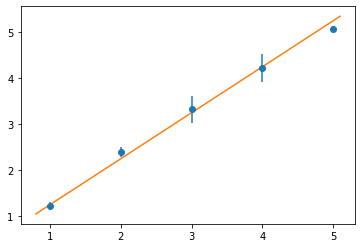

In [15]:
plt.errorbar(AT['mag_cat'],AT['mag_inst'],AT['err_inst'],linestyle='None',marker='o')
model.intercept = np.median(ints)
plt.plot(np.linspace(0.8,5.1),model(np.linspace(0.8,5.1)))

In [429]:
model

<Linear1D(slope=1., intercept=0.06722017)>

In [418]:
model

<Linear1D(slope=1., intercept=1.)>

In [267]:
n = 3
bootstraps=bootstrap(AT['ind'],bootnum=n)
bootstraps.sort()
bootinds=bootstraps.astype(int)
model=models.Polynomial1D(1,c1=np.ones(n),fixed={'c1':True},n_models=n)
#fitter=fitting.SLSQPLSQFitter()
fitter=fitting.LinearLSQFitter()
fit=fitter(model,x[bootinds].T,y[bootinds])#,
           #weights=(1.0/yerr[bootinds].reshape(len(x),n))**2)
#fitter = fitting.FittingWithOutlierRemoval(fitting.LinearLSQFitter(), sigma_clip, sigma=3.0)
#best_fit, sigma_clipped = fitter(model, x[bootinds], y[bootinds], weights=(1.0/yerr[bootinds])**2)


ValueError: Polynomial1D gives unsupported >2D derivative matrix for this x/y

In [279]:
x[bootinds][np.newaxis, :]

array([[[1., 2., 2., 3., 4.],
        [1., 2., 4., 5., 5.],
        [1., 1., 2., 3., 4.]]])

In [290]:
y[bootinds][0]

array([1.1488364 , 2.36869844, 2.36869844, 3.2870604 , 4.3093803 ])

In [300]:
line1d=models.Linear1D(slope=np.ones(n),intercept=np.zeros(n),fixed={'slope':True},model_set_axis=1)
fitter=fitting.LinearLSQFitter()
model = fitter(model=line1d,x=x[bootinds],y=y[bootinds])

InputParameterError: All parameter values must be arrays of dimension at least 2 for model_set_axis=1 (the value given for 'slope' is only 1-dimensional)

In [269]:
line1d

<Linear1D(slope=[1., 1., 1.], intercept=[0., 0., 0.])>

In [255]:
fit.c0.value

array([2., 4., 1.])

In [234]:
fit(np.arange(3))

array([2., 5., 3.])

In [230]:
Y=fit(np.arange(3), model_set_axis=False)

array([[2., 3., 4.],
       [4., 5., 6.],
       [1., 2., 3.]])

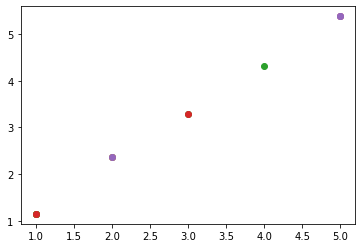

In [224]:
plt.plot(x[bootinds],y[bootinds],marker='o',linestyle='None')
plt.plot()

In [218]:
np.dstack((x[bootinds],y[bootinds])).shape

(3, 5, 2)

In [147]:
x[bootinds].reshape(5,3)

array([[1., 2., 3.],
       [5., 5., 1.],
       [3., 3., 4.],
       [4., 2., 2.],
       [2., 3., 5.]])

In [117]:
fit=fitter(model,x[bootinds], y[bootinds],weights=(1.0/yerr[bootinds])**2)



In [102]:
# Fit linear function with fixed slope, using sigma-clipping:
model = models.Linear1D(slope=1, fixed={'slope': True})
fitter = fitting.FittingWithOutlierRemoval(fitting.LinearLSQFitter(), sigma_clip, sigma=3.0)

best_fit, sigma_clipped = fitter(model, x[bootinds[0]], y[bootinds[0]], weights=(1.0/yerr[bootinds[0]])**2)
best_fit.intercept.value

<ErrorbarContainer object of 3 artists>

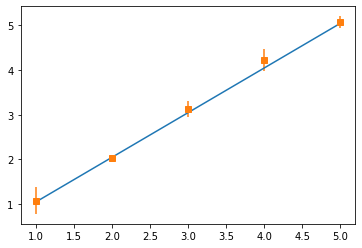

In [18]:
import matplotlib.pyplot as plt
plt.plot(x,best_fit(x))
plt.errorbar(x,y,yerr,linestyle='None',marker='s')

In [371]:
p = models.Polynomial1D(1, n_models=2, model_set_axis=0)

x = np.arange(0,4)

# Generate data for fitting 2 models and re-stack them along the last axis:
y = np.array([2*x+1, x+4])
y = np.moveaxis(y, 0, -1)



In [372]:
x1=np.arange(0,4)
x2=np.arange(0,4)
x3=np.vstack((x1,x2))
x1,x2,x3

(array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([[0, 1, 2, 3],
        [0, 1, 2, 3]]))

In [382]:
f = fitting.LinearLSQFitter()
fit = f(p, x3, y.T)
#print(fit.parameters)

ValueError: Polynomial1D gives unsupported >2D derivative matrix for this x/y

In [356]:
fit

<Polynomial1D(1, c0=[[1., 4.]], c1=[[2., 1.]], n_models=2)>